### This utility notebook provides graphic elements for the project. The output is self-explanatory.

In [1]:
import os
import pickle
from utils import vs

In [2]:
fn = os.path.expanduser('~/projects/insight/__data__/SCOTUS/best_results.p')
with open(fn, 'rb') as fp:
    df = pickle.load(fp)

In [3]:
df['delta_acc'] = df['NO_TEXT_best_acc'] - df['baseline']
df = df.sort_values(by='delta_acc')

#### This wrapper function controls the bar charts produced in the cells below.

In [4]:
def make_chart(values, s_labels, ylabel, title, ylims, xlabel='Justice',
               cats=df['justice'], leg_loc='upper right',
               width=0.32, figsize=(15, 7), hline=None):
    cats = cats
    ax_labels = [xlabel, ylabel]
    colors = ['#ff7777', '#f5cb04', '#3fdbcb']
    if len(values) == 1:
        colors = [colors[0]]
    else:
        colors = colors[-len(values):]
    series = dict(zip(s_labels, values))
    color_dict = dict(zip(s_labels, colors))
    fig = vs.bar(series, cats, ax_labels, title, color_dict, width=width, hline=hline,
                 ylims=ylims, legend_loc=leg_loc, alpha=0.8, figsize=figsize,
                 tick_label_size=13, tick_label_rot=60)
    return fig

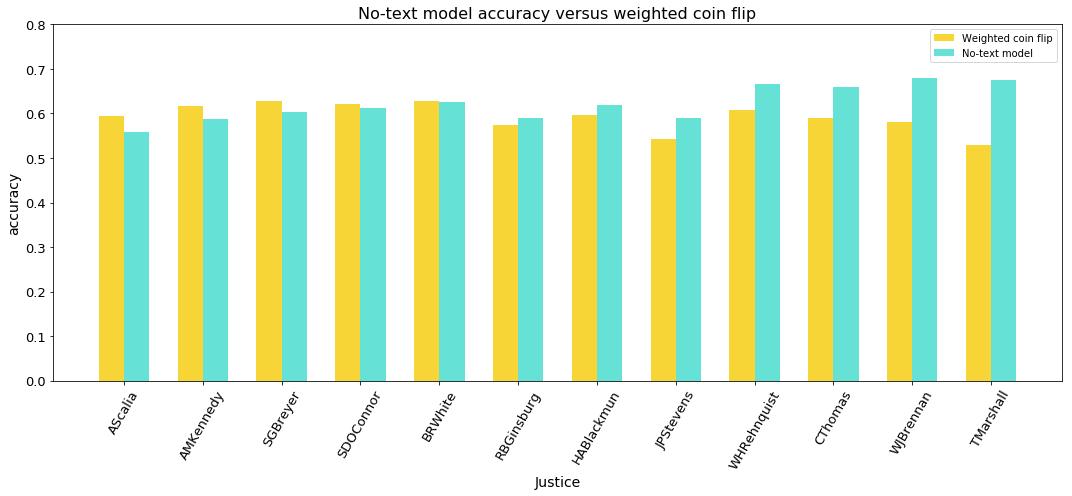

In [5]:
f = make_chart([df['baseline'], df['NO_TEXT_best_acc']], ['Weighted coin flip', 'No-text model'],
               'accuracy', 'No-text model accuracy versus weighted coin flip', (0, 0.8))
f.savefig('base_v_coin.png')

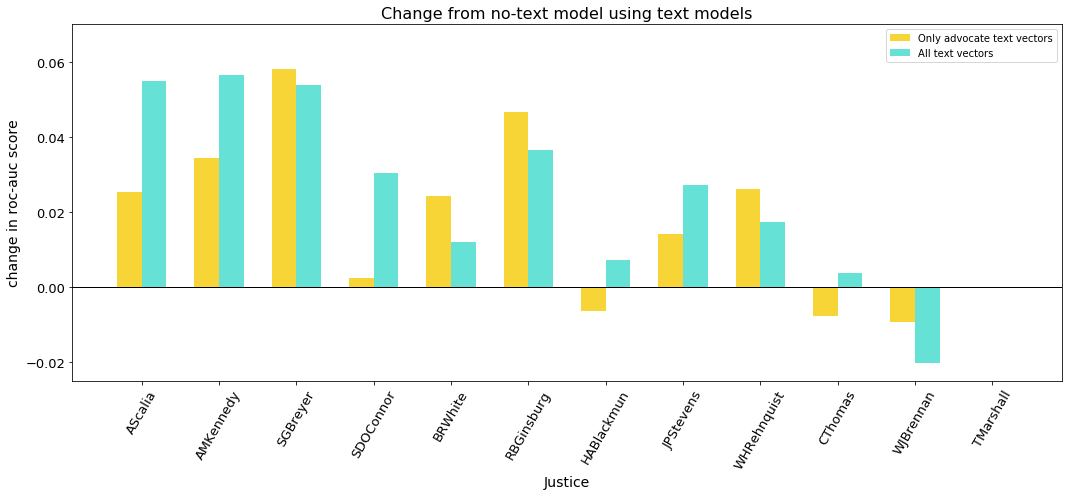

In [6]:
f = make_chart([df['ALL_BUT_SC_best_auc'] - df['NO_TEXT_best_auc'],
                df['ALL_best_auc'] - df['NO_TEXT_best_auc']],
               ['Only advocate text vectors', 'All text vectors'],
               'change in roc-auc score', 'Change from no-text model using text models',
               (-0.025, 0.07), hline=0)
f.savefig('base_v_text.png')

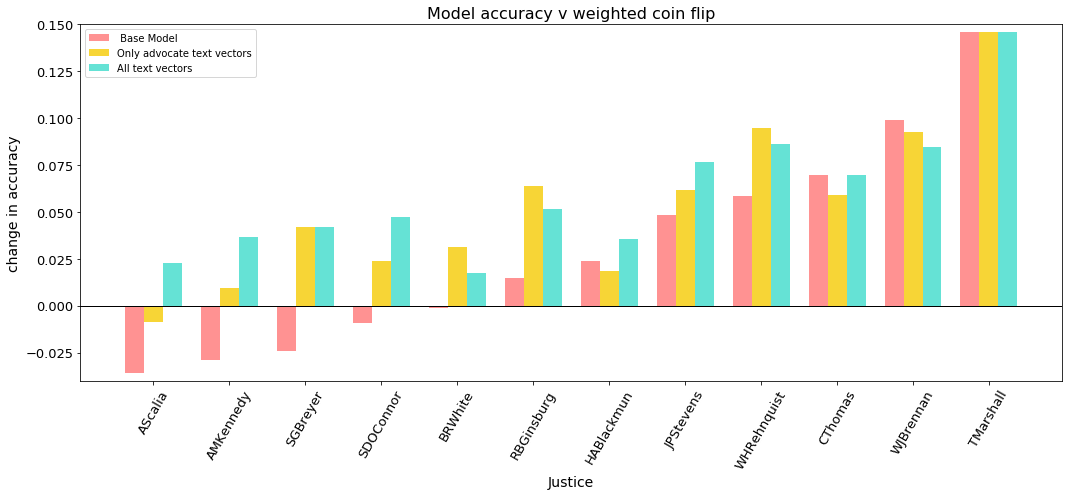

In [7]:
f = make_chart([df['NO_TEXT_best_acc'] - df['baseline'],
                df['ALL_BUT_SC_best_acc'] - df['baseline'],
                df['ALL_best_acc'] - df['baseline']],
               [' Base Model', 'Only advocate text vectors', 'All text vectors'],
               'change in accuracy', 'Model accuracy v weighted coin flip', (-0.04, 0.15),
               leg_loc='upper left', width=0.25, hline=0)
f.savefig('models_v_coin.png')

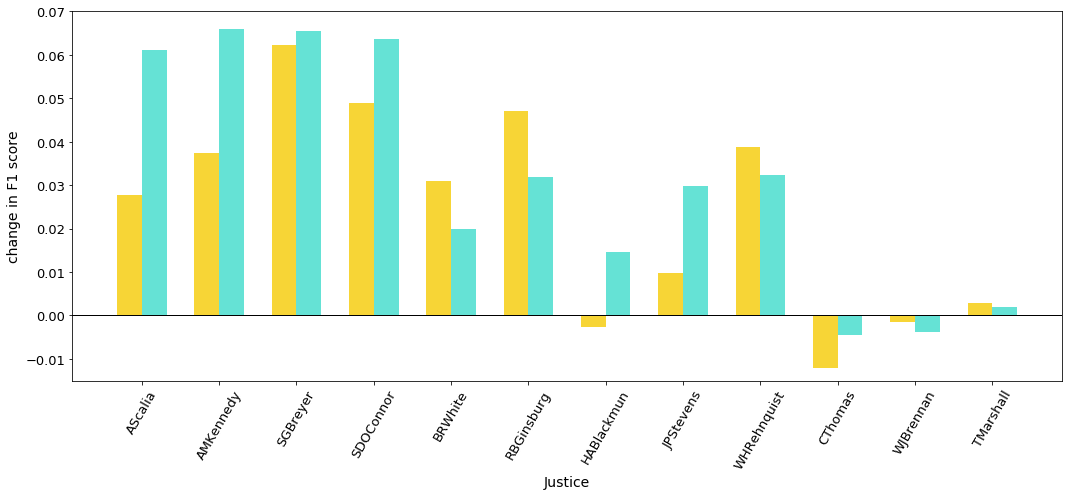

In [8]:
f = make_chart([df['ALL_BUT_SC_best_f1'] - df['NO_TEXT_best_f1'],
                df['ALL_best_f1'] - df['NO_TEXT_best_f1']],
               ['Only advocate text vectors', 'All text vectors'],
               'change in F1 score', '', (-0.015, 0.07),
               leg_loc=None, hline=0)
f.savefig('base_v_text_f1_no_leg.png')

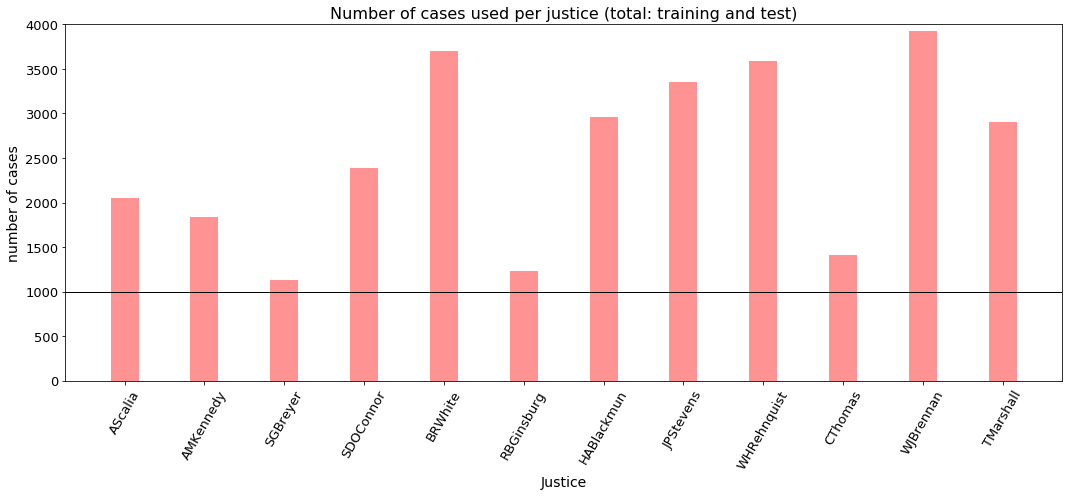

In [9]:
f = make_chart([df['num_cases']], ['Number of cases'], 'number of cases',
               'Number of cases used per justice (total: training and test)',
               (0, 4000), hline=1000, leg_loc=None, width=0.35)
f.savefig('num_cases.png')